# Projekt 1 – perceptron Rosenblatta

## Temat: płytka sieć do nauki problemu XOR

### To do:
* Krótki opis problemu - eze
* Opis zaimplementowanych funkcji - eze
* Opis zaimplementowanych zmiennych i stałych - eze
* Wykresy błędu MSE (błędu średniokwadratowego) w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym) - nie jestem pewien o co chodzi z "w obu warstwach (na przykładach uczących oraz na całym zbiorze uczącym)"
* wykresy błędu klasyfikacji (przyjmujemy próg 0.5 dla klasyfikacji 0-1) - okej troche mi się nie chce
* wykresy wag w obu warstwach. - okej troche mi się nie chce

### To do - jak wystarczy czasu - pewnie nie wystarczy:
* szybsze kończenie uczenia przy spadku MSE poniżej zadanej wartości,
* dodanie momentum,
* adaptacyjny współczynnik uczenia,
* dodanie mini-batch.

In [75]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [76]:
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

In [77]:
np.random.seed(0)

In [78]:
# generate data
def data_generator(random = False, multiply_by = 1, shuffle = True):
    if random:
        X = np.random.binomial(1, 0.5, (4*multiply_by, 2))
        Y = np.array([[X[i][0] ^ X[i][1]] for i in range(0,X.shape[0])])
    else:
        X = np.array([[0,0],[0,1],[1,0],[1,1]])
        Y = np.array([[0],[1],[1],[0]])
        X = np.tile(X, (multiply_by, 1))
        Y = np.tile(Y, (multiply_by, 1))
        
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]
    return X, Y

In [79]:
# activation function
def sigmoid(x): 
	return 1.0/(1.0 + np.exp(-x))

def sigmoid_prime(x): 
    return x * (1 - x)

In [80]:
# weights and biases initialization
def initialize_params():
    # output layer weights and biases
    W1 = np.random.rand(inputLayerNeurons, hiddenLayerNeurons) - 0.5
    b1 = np.random.rand(1, hiddenLayerNeurons) - 0.5
    # hidden layer weights and biases
    W2 = np.random.rand(hiddenLayerNeurons, outputLayerNeurons) - 0.5
    b2 = np.random.rand(1, outputLayerNeurons) - 0.5
    return W1, b1, W2, b2

In [81]:
def forward_prop(W1, b1, W2, b2, X):
    # 1. layer
    Z1 = np.dot(X,W1) + b1
    A1 = sigmoid(Z1)
    
    # 2. layer
    Z2 = np.dot(A1,W2) + b2
    A2 = sigmoid(Z2)
    
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y): 
    # 2. layer
    dA2 = Y - A2 # Error
    dZ2 = dA2 * sigmoid_prime(A2)
    
    # 1. layer
    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_prime(A1) 
    
    return dZ1, dZ2, dA2

def update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr):
    # 1. layer
    W1 = W1 + lr * X.T.dot(dZ1)
    b1 = b1 + lr * np.sum(dZ1,axis=0,keepdims=True) * lr   
    
    # 2. layer 
    W2 = W2 + lr * A1.T.dot(dZ2)  
    b2 = b2 + lr * np.sum(dZ2,axis=0,keepdims=True) * lr    
    
    return W1, b1, W2, b2


In [82]:
# def get_predictions(A2):
### TO DO

# def get_accuracy(predictions, Y):
### TO DO

def gradient_descent(X, Y, lr, iterations, logs = True):
    W1, b1, W2, b2 = initialize_params()
    Error = []
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dZ1, dZ2, dA2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dZ1, dZ2, X, A1, lr)
        Error.append(np.mean(dA2**2))
        if i % 100 == 0 and logs:
            print("Iteration: ", i)
            print(A2.T)
            print(Y.T)
    print("Final Predictions")
    print(A2.T)
    print(Y.T)
    return W1, b1, W2, b2, Error

In [85]:
X, Y = data_generator(random = False, multiply_by = 1, shuffle = False)

W1, b1, W2, b2, Error = gradient_descent(X, Y, 0.1, 30000, logs = False)
print(Error)

Final Predictions
[[0.04612794 0.96312196 0.91930013 0.02367553]]
[[0 1 1 0]]
[0.2509327680946304, 0.250902156892882, 0.2508725419957489, 0.25084389095510073, 0.2508161723749424, 0.2507893558778693, 0.2507634120725414, 0.25073831252214834, 0.2507140297138415, 0.25069053702910427, 0.2506678087150361, 0.250645819856525, 0.25062454634928455, 0.2506039648737295, 0.25058405286966734, 0.2505647885117824, 0.25054615068588953, 0.2505281189659346, 0.2505106735917213, 0.25049379544734135, 0.25047746604028837, 0.25046166748123444, 0.2504463824644506, 0.2504315942488508, 0.25041728663964025, 0.25040344397055203, 0.2503900510866507, 0.2503770933276893, 0.2503645565119989, 0.2503524269208977, 0.2503406912836015, 0.2503293367626203, 0.2503183509396269, 0.25030772180178157, 0.25029743772849894, 0.2502874874786436, 0.25027786017814047, 0.25026854530798615, 0.2502595326926513, 0.25025081248885717, 0.250242375174719, 0.25023421153924147, 0.25022631267215656, 0.2502186699540916, 0.25021127504705853, 0.250

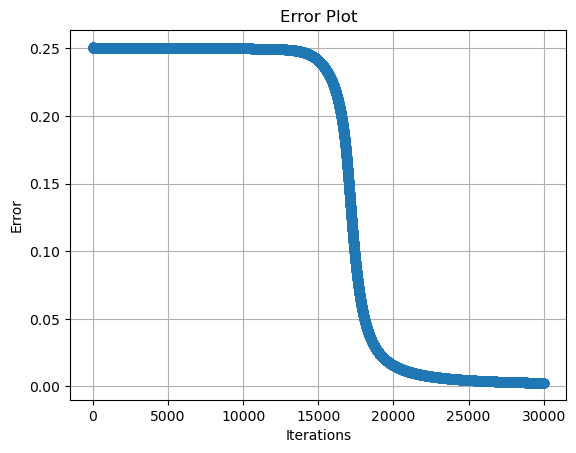

In [86]:
# Plotting the errors
plt.plot(Error, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title('Error Plot')
plt.grid(True)
plt.show()